# **Waze Project**
**Course 4 - The Power of Statistics**

Your team is nearing the midpoint of their user churn project. So far, you’ve completed a project proposal, and used Python to explore and analyze Waze’s user data. You’ve also used Python to create data visualizations. The next step is to use statistical methods to analyze and interpret your data.

You receive a new email from Sylvester Esperanza, your project manager. Sylvester tells your team about a new request from leadership: to analyze the relationship between mean amount of rides and device type. You also discover follow-up emails from three other team members: May Santner, Chidi Ga, and Harriet Hadzic. These emails discuss the details of the analysis. They would like a statistical analysis of ride data based on device type. In particular, leadership wants to know if there is a statistically significant difference in mean amount of rides between iPhone® users and Android™ users. A final email from Chidi includes your specific assignment: to conduct a two-sample hypothesis test (t-test) to analyze the difference in the mean amount of rides between iPhone users and Android users.

A notebook was structured and prepared to help you in this project. Please complete the following questions and prepare an executive summary.

# **Course 4 End-of-course project: Data exploration and hypothesis testing**

In this activity, you will explore the data provided and conduct a hypothesis test.
<br/>

**The purpose** of this project is to demostrate knowledge of how to conduct a two-sample hypothesis test.

**The goal** is to apply descriptive statistics and hypothesis testing in Python.
<br/>

*This activity has three parts:*

**Part 1:** Imports and data loading
* What data packages will be necessary for hypothesis testing?

**Part 2:** Conduct hypothesis testing
* How did computing descriptive statistics help you analyze your data?

* How did you formulate your null hypothesis and alternative hypothesis?

**Part 3:** Communicate insights with stakeholders

* What key business insight(s) emerged from your hypothesis test?

* What business recommendations do you propose based on your results?

<br/>


Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Data exploration and hypothesis testing**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below to craft your response:
1. What is your research question for this data project? Later on, you will need to formulate the null and alternative hypotheses as the first step of your hypothesis test. Consider your research question now, at the start of this task.


==> ENTER YOUR RESPONSE HERE
The research question is the following:

Is the mean amount of rides between iPhone users and Android users statistically different?

To answer that question, I will conduct a two-sample hypothesis test (t-test) to analyze the difference in the mean amount of rides between iPhone users and Android users.

*Complete the following tasks to perform statistical analysis of your data:*

### **Task 1. Imports and data loading**




Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

<details>
  <summary><h4><strong>Hint:</strong></h4></summary>

Before you begin, recall the following Python packages and functions:

*Main functions*: stats.ttest_ind(a, b, equal_var)

*Other functions*: mean()

*Packages*: pandas, stats.scipy

</details>

In [63]:
# Import any relevant packages or libraries
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as mplot
import seaborn as sns

Import the dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Load dataset into dataframe
df = pd.read_csv('waze_dataset.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Analyze and Construct**

Consider the questions in your PACE Strategy Document and those below to craft your response:
1. Data professionals use descriptive statistics for exploratory data analysis (EDA). How can computing descriptive statistics help you learn more about your data in this stage of your analysis?


==> ENTER YOUR RESPONSE HERE

Using descriptive statistics I can understand more the behavior of the features I am interested to study, and also can identify if there are some problems with the data that I want to analyze. I need to be sure the data is correct to be analyzed and also I need to have a first impression of it.

### **Task 2. Data exploration**

Use descriptive statistics to conduct exploratory data analysis (EDA).

<details>
  <summary><h4><strong>Hint:</strong></h4></summary>

Refer back to *Self Review Descriptive Statistics* for this step-by-step proccess.

</details>

**Note:** In the dataset, `device` is a categorical variable with the labels `iPhone` and `Android`.

In order to perform this analysis, you must turn each label into an integer.  The following code assigns a `1` for an `iPhone` user and a `2` for `Android`.  It assigns this label back to the variable `device_new`.

**Note:** Creating a new variable is ideal so that you don't overwrite original data.



1. Create a dictionary called `map_dictionary` that contains the class labels (`'Android'` and `'iPhone'`) for keys and the values you want to convert them to (`2` and `1`) as values.

2. Create a new column called `device_type` that is a copy of the `device` column.

3. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `device_type` series. Pass `map_dictionary` as its argument. Reassign the result back to the `device_type` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['column']
```

|column |
|  :-:       |
| A     |
| B     |
| A     |
| B     |

```
map_dictionary = {'A': 2, 'B': 1}
df['column'] = df['column'].map(map_dictionary)
df['column']
```

|column |
|  :-: |
| 2    |
| 1    |
| 2    |
| 1    |


In [4]:
# 1. Create `map_dictionary`
### YOUR CODE HERE ###
map_dictionary = {'iPhone': 1, 'Android': 2}

# 2. Create new `device_type` column
### YOUR CODE HERE ###
df["device_type"] = df["device"]

# 3. Map the new column to the dictionary
### YOUR CODE HERE ###
df['device_type'] = df['device_type'].map(map_dictionary)
df['device_type']


0        2
1        1
2        2
3        1
4        2
        ..
14994    1
14995    2
14996    1
14997    1
14998    1
Name: device_type, Length: 14999, dtype: int64

You are interested in the relationship between device type and the number of drives. One approach is to look at the average number of drives for each device type. Calculate these averages.

In [16]:
### YOUR CODE HERE ###

# grouping drives by device_type
avg_drives_by_device = df.groupby('device_type').mean()[['drives']]
avg_drives_by_device = avg_drives_by_device.reset_index()

# printing the values
print(avg_drives_by_device)


   device_type     drives
0            1  67.859078
1            2  66.231838


In [37]:
# calculate the difference in mean drives by device_type

difference = avg_drives_by_device["drives"].loc[0] - avg_drives_by_device["drives"].loc[1]

print(difference)

1.6272399428104904


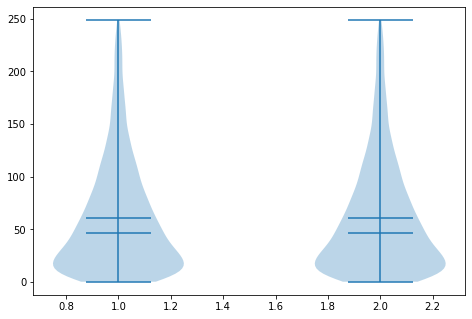

In [62]:
data_set_1 = df[df['device_type']==1]["drives"]
data_set_2 = df[df['device_type']==2]["drives"]

data_set_1 = data_set_1[data_set_1 < 250]
data_set_2 = data_set_2[data_set_2 < 250]

set_of_Columns = [data_set_2, data_set_2]

fig = mplot.figure()
axes = fig.add_axes([0,0,1,1])
vp = axes.violinplot(set_of_Columns, showmeans = True, showmedians = True)
mplot.show()

Text(0, 0.5, 'Drives')

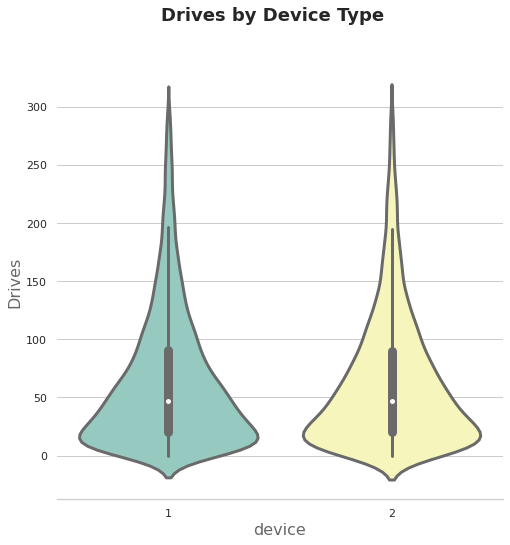

In [66]:
df2 = df[df["drives"] < 300]

sns.set(style="whitegrid")

f, ax = mplot.subplots(figsize=(8, 8))

# Show each distribution with both violins and points
sns.violinplot(x="device_type",y="drives",data=df2, inner="box", palette="Set3", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('Drives by Device Type', fontsize=18, fontweight='bold')
ax.set_xlabel("device",size = 16,alpha=0.7)
ax.set_ylabel("Drives",size = 16,alpha=0.7)

Based on the averages shown, it appears that drivers who use an iPhone device to interact with the application have a higher number of drives on average. However, this difference might arise from random sampling, rather than being a true difference in the number of drives. To assess whether the difference is statistically significant, you can conduct a hypothesis test.


### **Task 3. Hypothesis testing**

Your goal is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test:


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis

**Note:** This is a t-test for two independent samples. This is the appropriate test since the two groups are independent (Android users vs. iPhone users).

Recall the difference between the null hypothesis ($H_0$) and the alternative hypothesis ($H_A$).

**Question:** What are your hypotheses for this data project?

==> ENTER YOUR RESPONSE HERE

The hypothesis of this data project are the following:

H0: The difference between mean rides of iPhone and Android users is statistically equal to zero

H1: The difference between mean rides of iPhone and Android users is statistically different from zero


Next, choose 5% as the significance level and proceed with a two-sample t-test.

You can use the `stats.ttest_ind()` function to perform the test.


**Technical note**: The default for the argument `equal_var` in `stats.ttest_ind()` is `True`, which assumes population variances are equal. This equal variance assumption might not hold in practice (that is, there is no strong reason to assume that the two groups have the same variance); you can relax this assumption by setting `equal_var` to `False`, and `stats.ttest_ind()` will perform the unequal variances $t$-test (known as Welch's `t`-test). Refer to the [scipy t-test documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.


1. Isolate the `drives` column for iPhone users.
2. Isolate the `drives` column for Android users.
3. Perform the t-test

In [67]:
# 1. Isolate the `drives` column for iPhone users.
### YOUR CODE HERE ###
df_iphone = df[df['device_type']==1]["drives"]

# 2. Isolate the `drives` column for Android users.
### YOUR CODE HERE ###
df_android = df[df['device_type']==2]["drives"]

# 3. Perform the t-test
### YOUR CODE HERE ###

# For this analysis, the significance level is 5%
significance_level = 0.05

# Compute the p-value here
stats.ttest_ind(a=df_iphone, b=df_android, equal_var=False) #equal_var=False to assume var of populations are different


Ttest_indResult(statistic=1.4635232068852353, pvalue=0.1433519726802059)

**Question:** Based on the p-value you got above, do you reject or fail to reject the null hypothesis?

==> ENTER YOUR RESPONSE HERE

The pvalue of this experiment is 0.14, so pvalue > 0.05, which implies that we fail to reject the null hypothesis, that is, we fail to reject that the difference between mean rides of iPhone and Android users is statistically equal to zero. 

In other words, we don't have statistical evidences to affirm that  the difference between mean rides of iPhone and Android users is not due to chance. 

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4. Communicate insights with stakeholders**

Now that you've completed your hypothesis test, the next step is to share your findings with the Waze leadership team. Consider the following question as you prepare to write your executive summary:

* What business insight(s) can you draw from the result of your hypothesis test?

==> ENTER YOUR RESPONSE HERE

There are two business insights I can conclude from this data analysis project. 
First, there is a difference of 1.63 (approx. 2) rides in the average rides between Uber users using iPhone in comparison to the ones using Android. Users with an iPhone have on average 2 more rides than the ones using the app with an Android mobile phone, for the time period evaluated.

Second, we can conclude, based on a two sample t-test, that this difference between average rides is not statistically significant, at 0.05 level of significance (and even at a 0.1 level of significance).

This results also gives us an indication about the device type as a not relevant feature for future analysis of the rides and its behavior in the business. It would not be a good feature to be considered in a future Churn Analysis (this result is consistent with the previous EDA done to the dataset).

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.